In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams.update({"font.size": 14})
pd.set_option("display.precision", 2)

<IPython.core.display.Javascript object>

In [4]:
feat = np.concatenate(
    [
        np.random.normal(50, 10, 1000),
        np.random.normal(90, 15, 1000),
        np.random.normal(170, 20, 1000),
    ]
)
#np.random.shuffle(feat)
timestamp = ["t_" + str(i) for i in range(len(feat))]
df = pd.DataFrame({"timestamp": timestamp, "feat": feat})
df.head(10)


,timestamp,feat
0,t_0,41.84
1,t_1,47.69
2,t_2,44.66
3,t_3,56.80
4,t_4,25.50
5,t_5,50.98
6,t_6,55.23
7,t_7,54.19
8,t_8,61.09
9,t_9,43.13


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Feature Value')

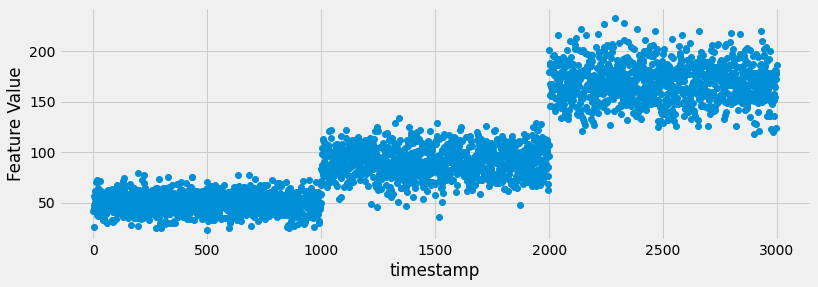

<IPython.core.display.Javascript object>

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(df["feat"], "o")
plt.xlabel("timestamp")
plt.ylabel("Feature Value")

In [18]:
kbin = KBinsDiscretizer(n_bins=3, strategy="kmeans", encode="ordinal")
kbin.fit(np.array(df["feat"]).reshape(-1, 1))
df["feat_transf"] = kbin.transform(df["feat"].array.reshape(-1, 1)).flatten()
df.sample(10)

,timestamp,feat,feat_transf
1948,t_1948,77.66,1.0
1681,t_1681,81.47,1.0
865,t_865,61.54,0.0
2035,t_2035,173.86,2.0
2173,t_2173,163.17,2.0
1361,t_1361,91.24,1.0
491,t_491,56.07,0.0
2350,t_2350,191.95,2.0
1778,t_1778,111.89,1.0
1608,t_1608,88.91,1.0


<IPython.core.display.Javascript object>

In [19]:
print(kbin.bin_edges_)

[array([ 23.14120657,  73.5403861 , 132.71199912, 233.49292574])]


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Histogram (Count)')

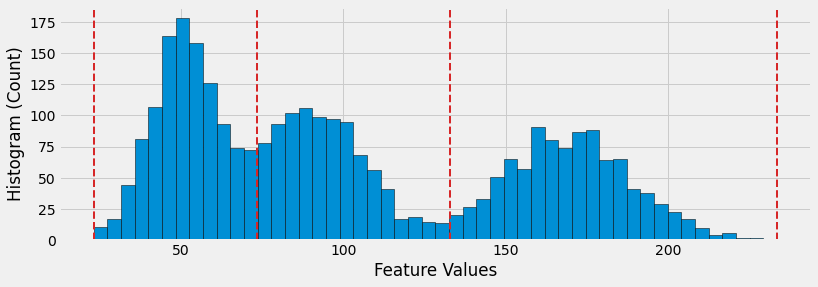

<IPython.core.display.Javascript object>

In [20]:
plt.hist(df["feat"], bins=50, edgecolor="black")
for i in kbin.bin_edges_[0]:
    plt.axvline(
        i, color="tab:red", linestyle="dashed", linewidth=2,
    )
plt.xlabel("Feature Values")
plt.ylabel("Histogram (Count)")

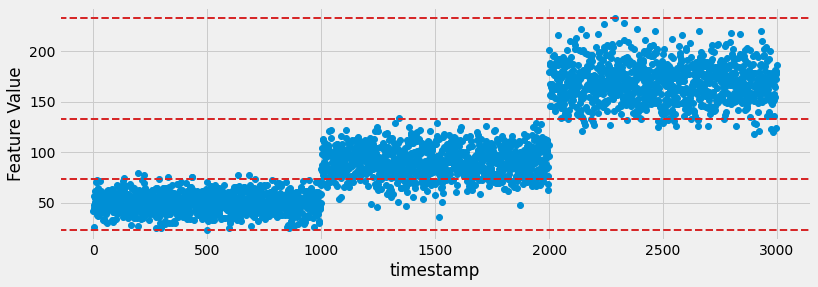

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(df["feat"], "o")
plt.xlabel("timestamp")
plt.ylabel("Feature Value")
for i in kbin.bin_edges_[0]:
    plt.axhline(
        i, color="tab:red", linestyle="dashed", linewidth=2,
    )